In [7]:
import os
import xarray as xr
import pandas as pd
import geopandas as gpd
import pyorc
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize


In [8]:
cam_config = pyorc.load_camera_config("./ngwerere.json")
# cs_file = "ngwerere_cross_section_new.csv"
cs_file = "./cross_section2.geojson"
video_file = "./ngwerere_20191103.mp4"

# we load the video as before
video = pyorc.Video(
    video_file,
    camera_config=cam_config,
    start_frame=0,
    end_frame=1,
    h_a=0.,
)

# the cross section is stored in a simple geojson point (x, y, z) file
cs_gdf = gpd.read_file(cs_file)
cross_section = pyorc.CrossSection(camera_config=cam_config, cross_section=cs_gdf)
cross_section


Scanning video: 100%|██████████| 2/2 [00:00<00:00, 11.10it/s]


LINESTRING Z (642732.4200000002 8304297.063 1182.3, 642732.5810000001 8304297.032 1182.15, 642732.7409999999 8304297.001 1182.1, 642732.8780000003 8304296.974 1182.1, 642733.0150000001 8304296.948 1182.1, 642733.152 8304296.922 1182.1, 642733.3050000002 8304296.892000001 1182.05, 642733.458 8304296.862 1182, 642733.635 8304296.828 1181.967, 642733.8119999999 8304296.794 1181.933, 642733.99 8304296.76 1181.9, 642734.1429999999 8304296.73 1181.85, 642734.2959999999 8304296.7 1181.8, 642734.4370000002 8304296.673 1181.867, 642734.5770000005 8304296.646 1181.933, 642734.7180000003 8304296.619 1182, 642734.871 8304296.589 1182, 642735.0230000004 8304296.56 1182, 642735.176 8304296.53 1182, 642735.34 8304296.499 1182.033, 642735.5040000002 8304296.467 1182.2, 642735.6690000005 8304296.435 1182.3, 642735.8349999998 8304296.403 1182.3, 642736.0010000002 8304296.371 1182.3, 642736.1660000001 8304296.339 1182.3)

C:\Users\dhaba\AppData\Local\Temp\ipykernel_13744\4279131158.py:1: UserWarning: No water level is provided. Camera configuration reference water level is used.
  ax = cross_section.plot()


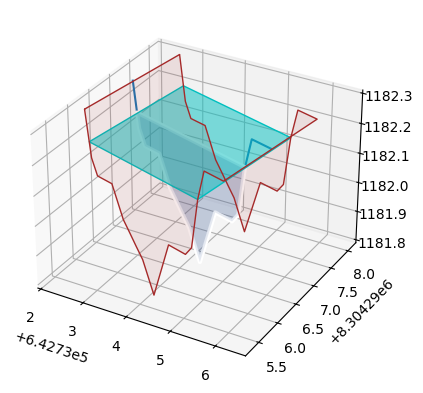

In [9]:
ax = cross_section.plot()

C:\Users\dhaba\AppData\Local\Temp\ipykernel_13744\2011025927.py:9: UserWarning: No water level is provided. Camera configuration reference water level is used.
  cross_section.plot(camera=True, ax=ax1, planar=False, bottom_kwargs={"alpha": 0.6, "color": "brown"})
C:\Users\dhaba\AppData\Local\Temp\ipykernel_13744\2011025927.py:14: UserWarning: No water level is provided. Camera configuration reference water level is used.
  cross_section.plot(ax=ax2)


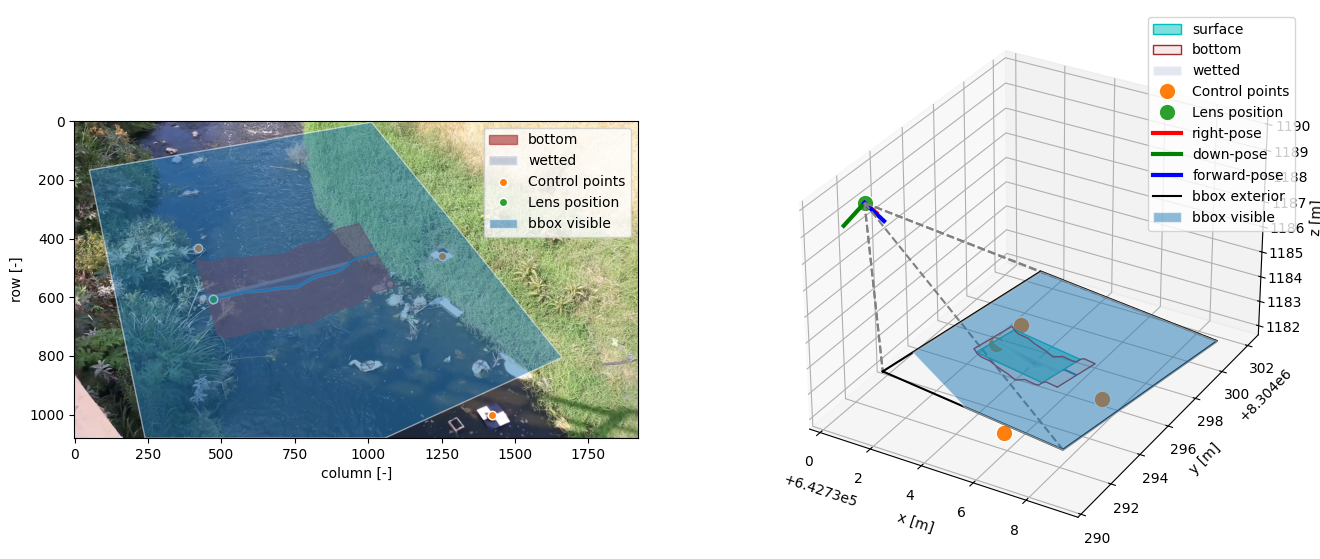

In [10]:
fig = plt.figure(figsize=(16, 7))
ax1 = fig.add_subplot(1, 2, 1)
# for the 3D plot, we need to explicitly define a 3d projection
ax2 = fig.add_subplot(1, 2, 2, projection="3d")
# now plot an image on the first
frame = video.get_frames(method="rgb")[0]
ax1.imshow(frame)  # .frames.plot(ax=ax1)
# on top of this, plot the cross section WITH camera=True, we skip the planar surface and make the bottom look a bit stronger.
cross_section.plot(camera=True, ax=ax1, planar=False, bottom_kwargs={"alpha": 0.6, "color": "brown"})
# and add the camera config too!
cross_section.camera_config.plot(mode="camera", ax=ax1)

# and do the 3d plot also
cross_section.plot(ax=ax2)
cross_section.camera_config.plot(mode="3d", ax=ax2)
ax2.set_aspect("equal")

In [11]:
img = video.get_frames()[0].values  # we use "values" as we need a raw numpy array
h = cross_section.detect_water_level(img)
print(f"The optimized water level is {h} meters")


The optimized water level is 0.0559909779467489 meters


C:\Users\dhaba\AppData\Local\Temp\ipykernel_13744\1530537871.py:6: UserWarning: No water level is provided. Camera configuration reference water level is used.
  cross_section.plot(camera=True, ax=ax, planar=False, bottom_kwargs={"alpha": 0.4, "color": "brown"})
C:\Users\dhaba\AppData\Local\Temp\ipykernel_13744\1530537871.py:12: UserWarning: No water level is provided. Camera configuration reference water level is used.
  cross_section.plot(ax=ax2)


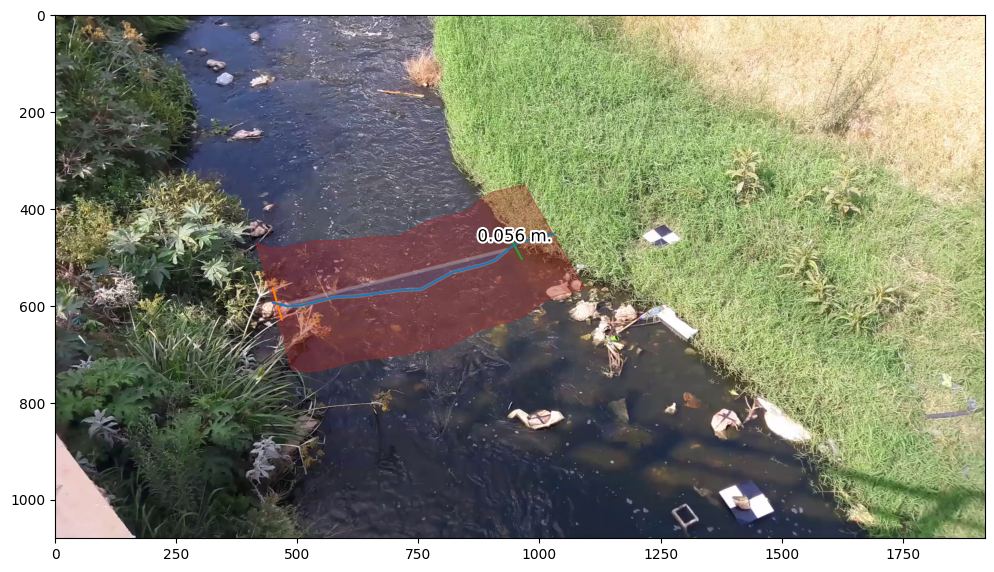

In [12]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(1, 1, 1)
# plot the rgb image
ax.imshow(frame)  # .frames.plot(ax=ax1)
# on top of this, plot our new water level, with also the water line, using 2 plot methods
cross_section.plot(camera=True, ax=ax, planar=False, bottom_kwargs={"alpha": 0.4, "color": "brown"})
cross_section.plot_water_level(h=h, camera=True, ax=ax)
# and add the camera config too!
cross_section.camera_config.plot(mode="camera", ax=ax1)

# and do the 3d plot also
cross_section.plot(ax=ax2)
cross_section.camera_config.plot(mode="3d", ax=ax2)
ax2.set_aspect("equal")

Retrieving or providing cached version of dataset from doi:10.5281/zenodo.15002591/20241010_081717.mp4


100%|#############################################| 1.48M/1.48M [00:00<?, ?B/s]


Hommerich video is available in C:\Users\dhaba\AppData\Local\pyorc\pyorc\Cache\20241010_081717.mp4
Retrieving or providing cached version of dataset from doi:10.5281/zenodo.15002591/hommerich_20241010_081717_pyorc_data.zip.zip


100%|#############################################| 5.09k/5.09k [00:00<?, ?B/s]


Hommerich video is available in C:\Users\dhaba\AppData\Local\pyorc\pyorc\Cache\hommerich_20241010_081717_pyorc_data.zip.zip
Unzipping sample data...


Scanning video: 100%|██████████| 122/122 [00:01<00:00, 99.56it/s] 
C:\Users\dhaba\AppData\Local\Temp\ipykernel_13744\1198332640.py:24: UserWarning: No water level is provided. Camera configuration reference water level is used.
  cross_section.plot(ax=ax2)


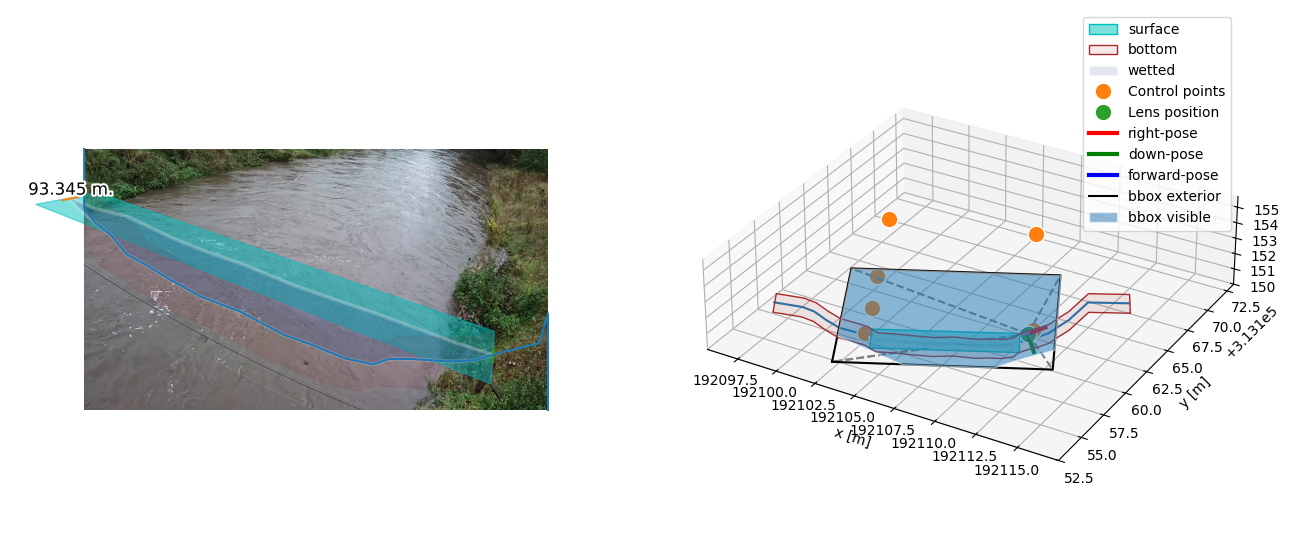

In [13]:
vid_file = pyorc.sample_data.get_hommerich_dataset()
vid_path = pyorc.sample_data.get_hommerich_pyorc_files()
cam_config_file = os.path.join(vid_path, "cam_config_gcp1.json")
cross_section_fn = os.path.join(vid_path, "cs1_ordered.geojson")

# get a new video object
cam_config = pyorc.load_camera_config(cam_config_file)
video = pyorc.Video(vid_file, camera_config=cam_config)

# get a new cross section object
gdf = gpd.read_file(cross_section_fn)
cross_section = pyorc.CrossSection(camera_config=cam_config, cross_section=gdf)

# plot together
fig = plt.figure(figsize=(16, 7))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2, projection="3d")
frame = video.get_frames(method="rgb")[0]
ax1.imshow(frame)
# we plot with the actual water level during the video now.
cross_section.plot(camera=True, h=93.345, ax=ax1)
cross_section.plot_water_level(camera=True, h=93.345, ax=ax1)

cross_section.plot(ax=ax2)
cross_section.camera_config.plot(mode="3d", ax=ax2)
ax2.set_aspect("equal")
# switch off axis labelling
ax1.set_axis_off()

The optimized water level is 93.03081898075743 meters


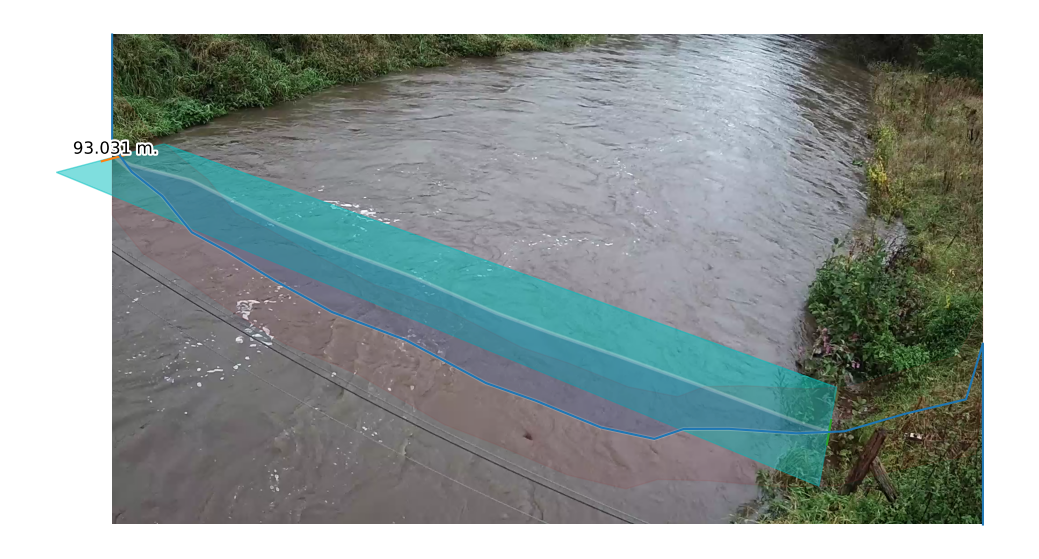

In [14]:
img = video.get_frames()[0].values
h = cross_section.detect_water_level(img)
print(f"The optimized water level is {h} meters")

# and also make a plot
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(frame)
# we plot with the actual water level during the video now.
cross_section.plot(camera=True, h=h, ax=ax)
cross_section.plot_water_level(camera=True, h=h, ax=ax)
ax.set_axis_off()